In [43]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [5]:
bounds = [[(0, 1), (0, 1)],
          [(2, 4), (1, 4)],
          [(1, 3), (2, 3)]]

In [6]:
bounds = [[(0, 10)] ,[(1, 9)], [(2, 8)], [(9, 10)], [(11, 12)]]

In [7]:
x_bounds = sorted([b[0] for b in bounds])
x_order = sorted(range(len(bounds)), key = lambda i: bounds[i][0])

In [110]:
x_bounds = [tuple(sorted((random.uniform(0, 100), random.uniform(0, 100)))) for _ in range(1000)]

In [111]:
sorted_x_bounds = sorted(x_bounds)
x_order = list(range(len(sorted_x_bounds)))

In [112]:
# brute force
def brute(sorted_x_bounds):
    collisions1 = [[False] * len(sorted_x_bounds) for _ in range(len(sorted_x_bounds))]
    for i in range(len(sorted_x_bounds)):
        for j in range(len(sorted_x_bounds)):
            if sorted_x_bounds[i][0] < sorted_x_bounds[j][0] < sorted_x_bounds[i][1] or sorted_x_bounds[i][0] < sorted_x_bounds[j][1] < sorted_x_bounds[i][1]:
                collisions1[i][j] = collisions1[j][i] = True
    return collisions1

In [113]:
# smart algorithm
def smart(sorted_x_bounds, x_order):
    tos = {0: sorted_x_bounds[0][0]}
    collisions2 = [[False] * len(sorted_x_bounds) for _ in range(len(sorted_x_bounds))]

    for i, x_bound in zip(x_order, sorted_x_bounds):
        for j in tuple(tos.keys()):
            if x_bound[0] >= tos[j]:
                del tos[j]
            else:
                collisions2[i][j] = collisions2[j][i] = True

        tos[i] = x_bound[1]
    
    return collisions2

In [114]:
def smart_2(sorted_x_bounds):
    collisions = [[False] * len(sorted_x_bounds) for _ in range(len(sorted_x_bounds))]
    
    l = []
    for i, x in enumerate(sorted_x_bounds):
        l.append((x[0], "s", i))
        l.append((x[1], "e", i))
    l.sort()
        
    active_particles = set()
    for t in l:
        if t[1] == "s":
            active_particles.add(t[2])
            for p in active_particles:
                collisions[p][t[2]] = collisions[t[2]][p] = True
        elif t[1] == "e":
            active_particles.remove(t[2])
            
    for i in range(len(sorted_x_bounds)):
        collisions[i][i] = False
            
    return collisions

In [115]:
c1 = brute(sorted_x_bounds)

In [116]:
c3 = smart_2(sorted_x_bounds)

In [117]:
c1 == c3

True

In [129]:
brute_times = []
smart_times = []
smart_2_times = []
ns = np.linspace(1, 6000, 11, dtype=int)

In [130]:
for n in ns:
    x_bounds = [tuple(sorted((random.uniform(0, 100), random.uniform(0, 100)))) for _ in range(n)]
    sorted_x_bounds = sorted(x_bounds)
    x_order = list(range(len(sorted_x_bounds)))
    
    s = time.time()
    c1 = brute(sorted_x_bounds)
    f = time.time()
    brute_times.append(f-s)
    
    s = time.time()
    c2 = smart(sorted_x_bounds, x_order)
    f = time.time()
    smart_times.append(f-s)
    
    s = time.time()
    c3 = smart_2(sorted_x_bounds)
    f = time.time()
    smart_2_times.append(f-s)
    
    print(n, c1==c2==c3)

1 True
600 True
1200 True
1800 True
2400 True
3000 True
3600 True
4200 True
4800 True
5400 True
6000 True


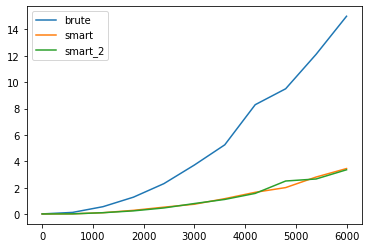

In [132]:
plt.plot(ns, brute_times, label="brute")
plt.plot(ns, smart_times, label="smart")
plt.plot(ns, smart_2_times, label="smart_2")
plt.legend()
plt.show()

In [35]:
c1 = brute(sorted_x_bounds)
c2 = smart(sorted_x_bounds, x_order)

In [32]:
c1 == c2

True